In [1]:
import os
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import json
%matplotlib inline

In [2]:
img_dir = './data/image'
ann_dir = './data/annotation'
outline_dir = './data/outline'

[{'label': 0, 'name': 'unknown', 'rgb': [0, 0, 0]},
 {'label': 1, 'name': 'balcony', 'rgb': [128, 0, 0]},
 {'label': 2, 'name': 'bath', 'rgb': [0, 128, 0]},
 {'label': 3, 'name': 'cl', 'rgb': [128, 128, 0]},
 {'label': 4, 'name': 'dk', 'rgb': [0, 0, 128]},
 {'label': 5, 'name': 'tatami', 'rgb': [128, 0, 128]},
 {'label': 6, 'name': 'wc', 'rgb': [0, 128, 128]},
 {'label': 7, 'name': 'washing', 'rgb': [128, 128, 128]},
 {'label': 8, 'name': 'west', 'rgb': [64, 0, 0]},
 {'label': 9, 'name': 'entrance', 'rgb': [192, 0, 0]},
 {'label': 10, 'name': 'door', 'rgb': [64, 128, 0]},
 {'label': 11, 'name': 'wall', 'rgb': [192, 128, 0]}]

In [14]:
def get_outline(arr):
    h, w, c = arr.shape
    for i in range(h):
        for j in range(w):
            if tuple(arr[i,j]) == (64, 128, 0) or tuple(arr[i,j]) == (192, 128, 0):
                arr[i,j] = 255
            else:
                arr[i,j] = 0
    return arr



In [22]:
# outline を計算、保存
for i, f in enumerate(os.listdir(ann_dir)[:]):
    if i > 0: break
    ann_path = os.path.join(ann_dir, f)
    out_path = os.path.join(outline_dir, f)
    
    arr = cv2.imread(ann_path)[:,:,::-1]
    ol = get_outline(arr)
    plt.imsave(out_path, ol)
    #break

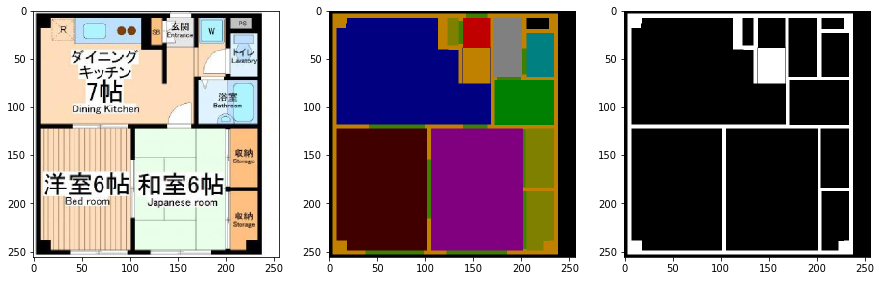

In [39]:
# image, label, outline を表示
for i, f in enumerate(os.listdir(img_dir)[:]):
    #if i > 0: break
    if f != '00199.jpg': continue
    img_path = os.path.join(img_dir, f)
    ann_path = os.path.join(ann_dir, f.replace('.jpg', '.png'))
    outline_path = os.path.join(outline_dir, f.replace('.jpg', '.png'))
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(131)
    arr = cv2.imread(img_path)[:,:,::-1]
    arr = cv2.resize(arr, (256, 256))
    plt.imshow(arr)
    
    plt.subplot(132)
    arr = cv2.imread(ann_path)[:,:,::-1]
    arr = cv2.resize(arr, (256, 256))
    plt.imshow(arr)
    
    plt.subplot(133)
    arr = cv2.imread(outline_path)[:,:,::-1]
    arr = cv2.resize(arr, (256, 256))
    plt.imshow(arr)
    plt.show()
    
    #break

number of labels: 3
(512, 512) int32


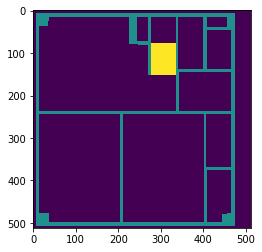

In [40]:
for f in os.listdir(outline_dir):
    
    if f != '00199.png': continue
    
    f_path = os.path.join(outline_dir, f)
    arr = cv2.imread(f_path, cv2.IMREAD_GRAYSCALE)
    
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(arr)

    # ラベル数
    print("number of labels:", retval)
    # ラベリング結果
    print(labels.shape, labels.dtype)  # (362, 420) int32

    fig, ax = plt.subplots(facecolor="w")
    ax.imshow(labels)
    #print(stats)
    plt.show()

In [45]:
f_train = open('./data/train.txt', 'w')
f_val = open('./data/val.txt', 'w')
f_test = open('./data/test.txt', 'w')

for i, x in enumerate(os.listdir(img_dir)):
    if i < 263*7: f_train.write(f'{os.path.splitext(x)[0]}\n')
    elif 263*7 <= i < 263*9: f_val.write(f'{os.path.splitext(x)[0]}\n')
    else: f_test.write(f'{os.path.splitext(x)[0]}\n')